<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Real-Estate Tycoon</h1>

<hr>
**For this project**:
* The dataset has 1883 observations in the county where the REIT operates.
* Each observation is for the transaction of one property only.
* Each transaction was between \$200,000 and \$800,000.

<hr>
We have the following features:

**Target variable**
* 'tx_price' - Transaction price in USD

**Public records for the property**
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

**Property characteristics**
* 'beds' - Number of bedrooms
* 'baths' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'basement' - Does the property have a basement?

**Location convenience scores**
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

**Neighborhood demographics**
* 'median_age' - Median age of the neighborhood
* 'married' - Percent of neighborhood who are married
* 'college_grad' - Percent of neighborhood who graduated college

**Schools**
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10

## Exploratory Analysis

In [2]:
from __future__ import print_function
print('Print function ready to serve.')

import numpy as np

import pandas as pd
pd.set_option('display.max_columns',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

df=pd.read_csv('project_files/real_estate_data.csv')

Print function ready to serve.


In [3]:
df.shape

(1883, 26)

In [11]:
df.head(2)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006


In [7]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [6]:
type(df.dtypes)

pandas.core.series.Series

In [14]:
# loop through categorical feature names and print each one
for feature in df.dtypes[df.dtypes=='object'].index:
    print(feature)

# df.dtypes[df.dtypes=='object']

property_type
exterior_walls
roof


In [18]:
# display last 5 rows of data
df.tail(2)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


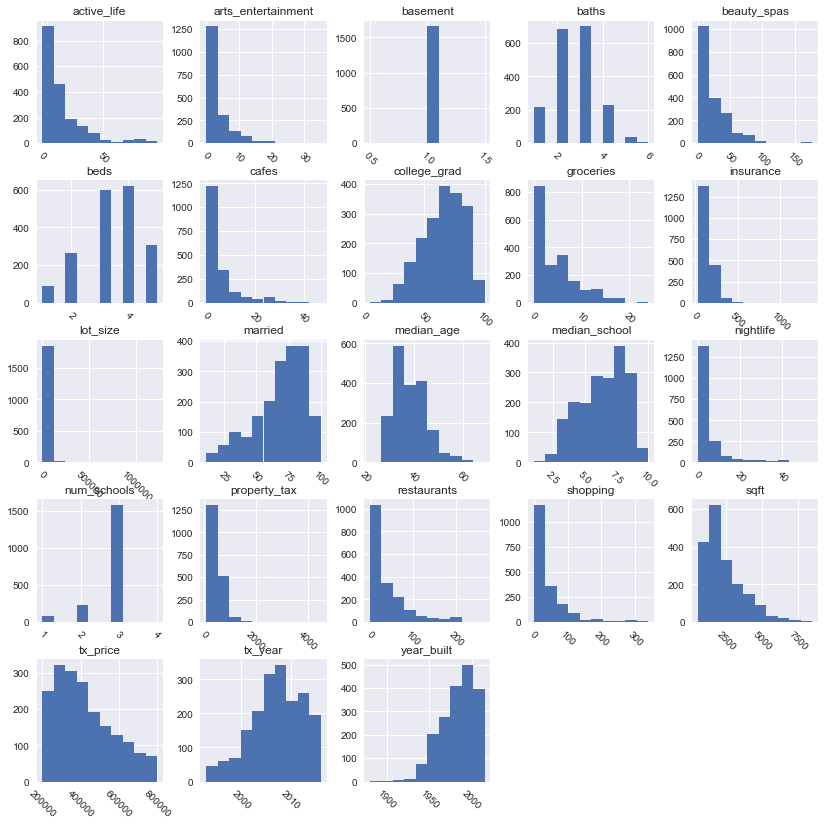

In [17]:
# Use Histogram to count (check distribution)
df.hist(figsize=(14,14),xrot=-45)
plt.show()

In [23]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [24]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


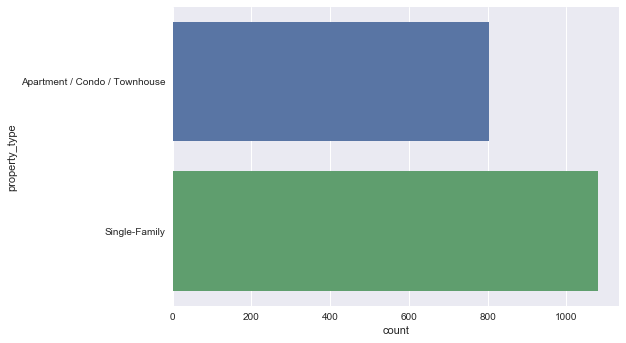

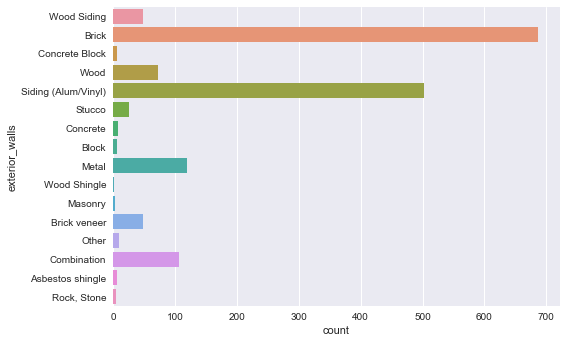

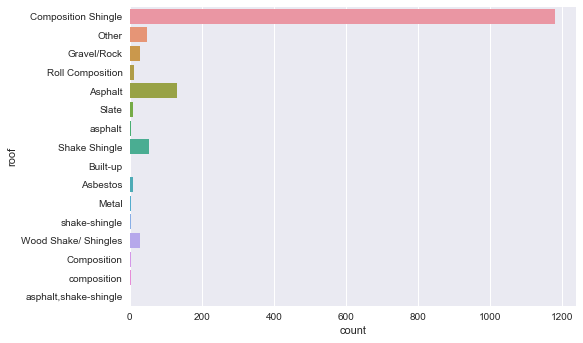

In [27]:
# Seaborn's countplot 
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature,data=df)
    plt.show()

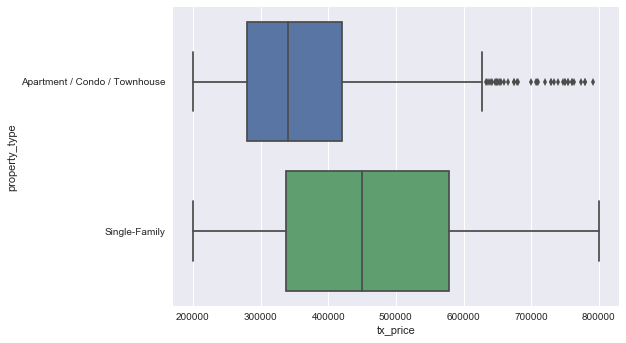

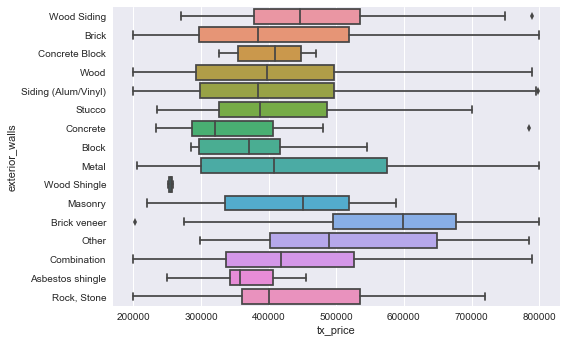

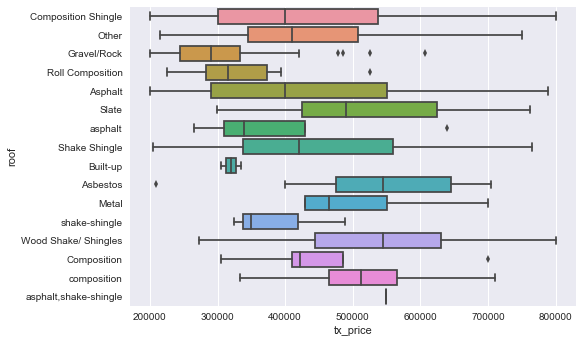

In [32]:
# segment tx_price by property_type and plot distributions
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.boxplot(y=feature,x='tx_price',data=df)
    plt.show()

In [31]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


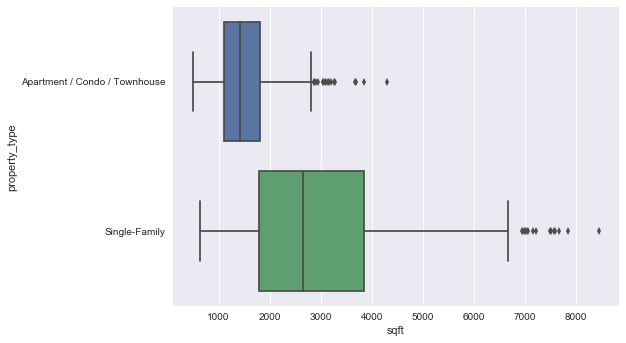

In [33]:
sns.boxplot(y='property_type',x='sqft',data=df)

In [38]:
df.groupby('property_type').agg(['mean','std'])

tx_price                     beds            \
                                  mean            std      mean       std   
property_type                                                               
Apartment / Condo / Townhouse   366614  121784.490482  2.601494  0.810220   
Single-Family                   464644  157758.739010  4.029630  0.795639   

                                  baths                   sqft               \
                                   mean       std         mean          std   
property_type                                                                 
Apartment / Condo / Townhouse  2.200498  0.815009  1513.727273   556.285898   
Single-Family                  2.862037  0.937551  2935.865741  1422.871041   

                                year_built                 lot_size  \
                                      mean        std          mean   
property_type                                                         
Apartment / Condo / Townhouse  1988.936488  15.513640   3944.239103   
Single-Family                  1978.523148  22.210582  20417.666667   

                                            basement      restaurants  \
                                        std     mean  std        mean   
property_type                                                           
Apartment / Condo / Townhouse  44284.168763      1.0  0.0   58.418431   
Single-Family                  44165.529296      1.0  0.0   26.672222   

                                         groceries           nightlife  \
                                     std      mean       std      mean   
property_type                                                            
Apartment / Condo / Townhouse  54.343594  5.919054  4.645774  7.855542   
Single-Family                  34.726416  3.453704  4.067285  3.007407   

                                             cafes             shopping  \
                                     std      mean       std       mean   
property_type                                                             
Apartment / Condo / Townhouse  10.643816  8.037360  9.077038  57.631382   
Single-Family                   5.543822  3.308333  5.325053  28.289815   

                                         arts_entertainment            \
                                     std               mean       std   
property_type                                                           
Apartment / Condo / Townhouse  61.852299           4.840598  5.234834   
Single-Family                  42.292313           2.318519  3.929691   

                              beauty_spas            active_life             \
                                     mean        std        mean        std   
property_type                                                                 
Apartment / Condo / Townhouse   32.087173  26.910443   22.410959  21.058178   
Single-Family                   16.970370  22.872112   10.946296  12.599296   

                              median_age              married             \
                                    mean       std       mean        std   
property_type                                                              
Apartment / Condo / Townhouse  37.199253  6.906584  57.534247  20.372706   
Single-Family                  39.643519  6.225732  77.685185  13.868205   

                              college_grad            property_tax  \
                                      mean        std         mean   
property_type                                                        
Apartment / Condo / Townhouse    66.372354  17.095874   346.261519   
Single-Family                    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47.118015   
Single-Family

In [40]:
correlations=df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


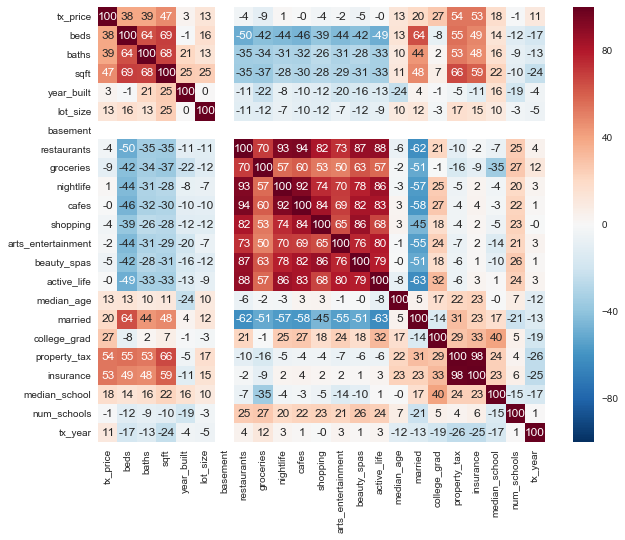

In [44]:
# Correlation Heatmap
sns.set_style('white')
plt.figure(figsize=(10,8))
sns.heatmap(correlations*100, annot=True, fmt='.0f') #.of to format to a whole number

In [45]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

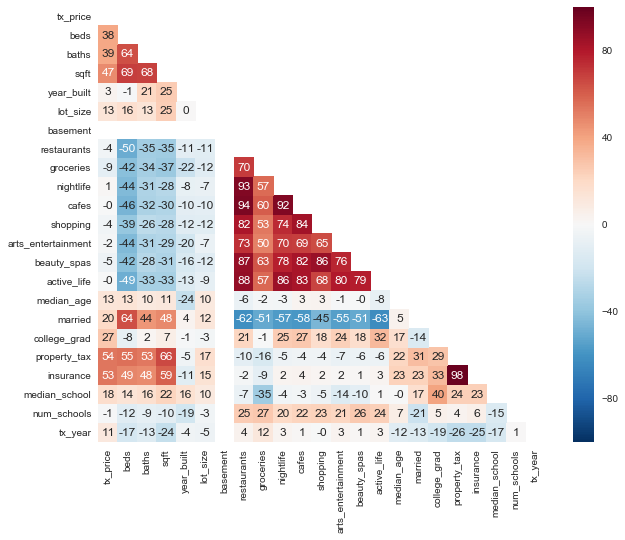

In [48]:
sns.set_style('white')
plt.figure(figsize=(10,8))
sns.heatmap(correlations*100, annot=True, fmt='.0f',mask=mask)

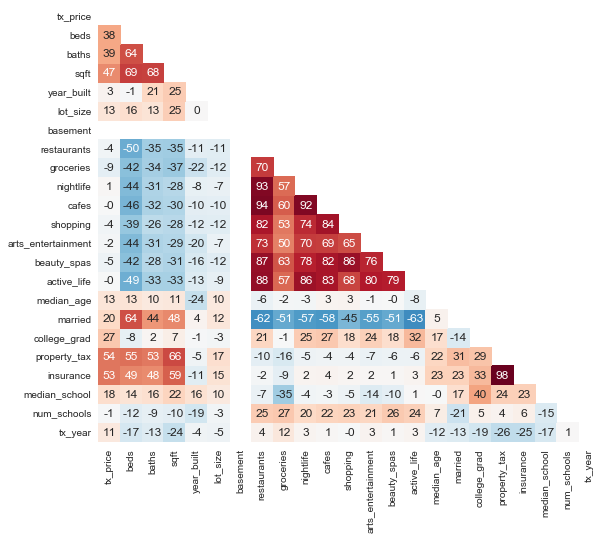

In [49]:
plt.figure(figsize=(9,8))
sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask, cbar=False)

# Data Cleaning

## Unwanted Observations

In [51]:
# Duplicate
df=df.drop_duplicates()
print(df.shape)

(1883, 26)


## Fix Structural errors

In [52]:
# basement --> unique value
df.basement.unique()

array([ nan,   1.])

In [53]:
# missing basement value should be 0, then dummy variable
df['basement']=df.basement.fillna(0)

In [54]:
df.basement.unique()

array([ 0.,  1.])

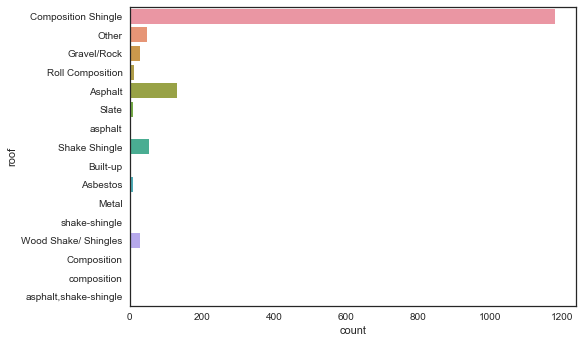

In [55]:
# Typos and capitalization
sns.countplot(y='roof',data=df)

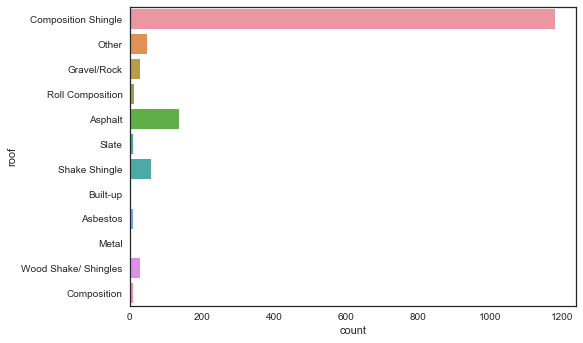

In [65]:
df.roof.replace('composition','Composition', inplace=True)
df.roof.replace('asphalt','Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'],'Shake Shingle', inplace=True)

sns.countplot(y='roof',data=df)

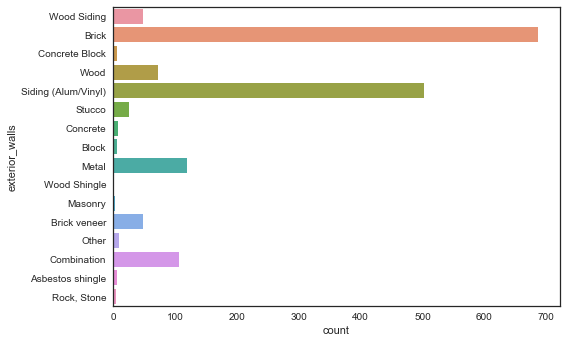

In [66]:
sns.countplot(y='exterior_walls',data=df)

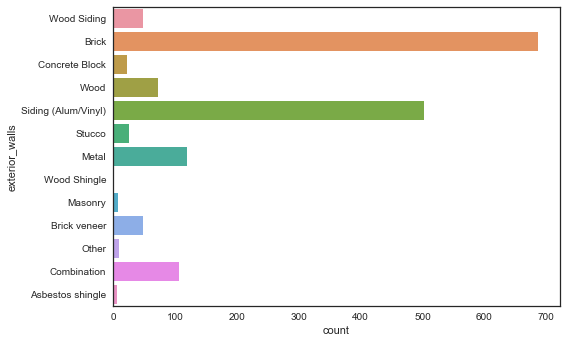

In [69]:
df.exterior_walls.replace('Rock, Stone','Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'],'Concrete Block', inplace=True)
sns.countplot(y='exterior_walls',data=df)

## Remove unwanted outliers

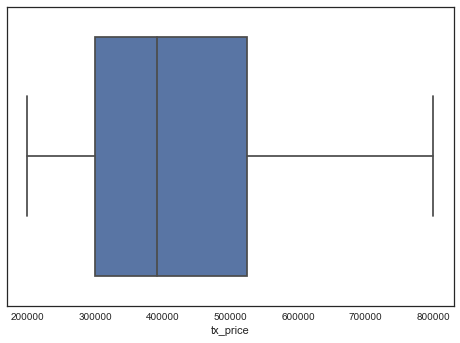

In [70]:
sns.boxplot(df.tx_price)

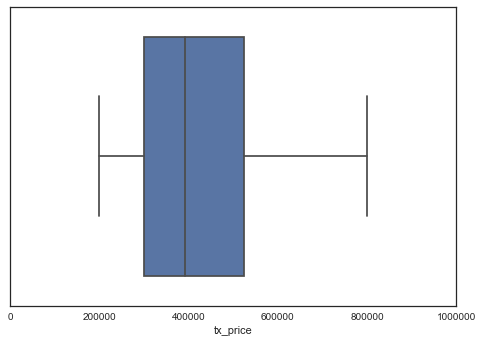

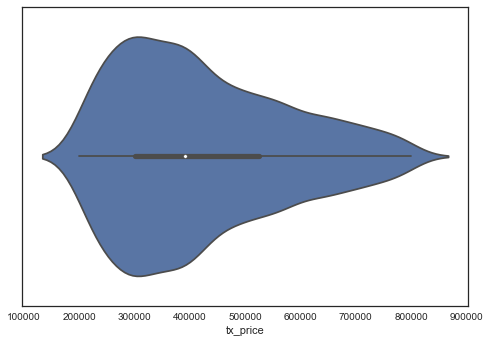

In [73]:
sns.boxplot(df.tx_price)
plt.xlim(0,1000000)
plt.show()

sns.violinplot(df.tx_price)
plt.show()

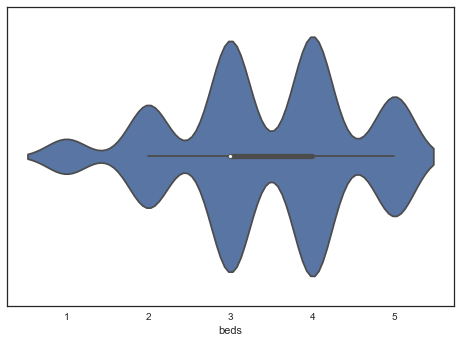

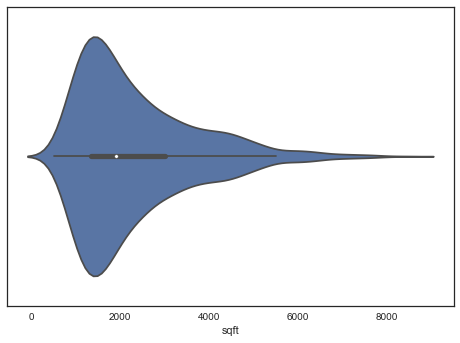

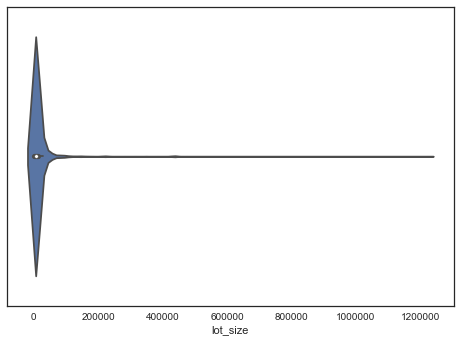

In [74]:
sns.violinplot(df.beds)
plt.show()

sns.violinplot(df.sqft)
plt.show()

sns.violinplot(df.lot_size)
plt.show()

In [75]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [76]:
df=df[df.lot_size<500000]
print(len(df))

1882


## Label missing categorical data

In [77]:
# find missing value
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [79]:
# Label missing as missing
df['exterior_walls']=df['exterior_walls'].fillna('Missing')
df['roof']=df['roof'].fillna('Missing')

In [80]:
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [81]:
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

## Flag and Fill Missing Numeric Data

In [82]:
df.select_dtypes(exclude=['object']).isnull().sum()
# http://pandas.pydata.org/pandas-docs/stable/missing_data.html#interpolation

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [83]:
df.to_csv('cleaned_df.csv', index=None)

# Feature Engineering

In [19]:
df = pd.read_csv('cleaned_df.csv')

In [20]:
df.head(3)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012


In [16]:
# 2 beds & 2 baths
df['two_and_two']=((df.beds==2) & (df.baths==2)).astype(int)
df.two_and_two.mean()

0.09458023379383634

In [17]:
df['year_2010_2013']=((df.tx_year>=2010) & (df.tx_year<=2013)).astype(int)
print(df.year_2010_2013.mean())

0.2635494155154091


In [18]:
a=((df.tx_year>=2010) & (df.tx_year<=2013)).astype(int)
b=df.tx_year.between(2010,2013).astype(int)
print( all(a==b) )

True


In [19]:
df['during_recession']= df.tx_year.between(2010,2013).astype(int)

## Group Sparse Data

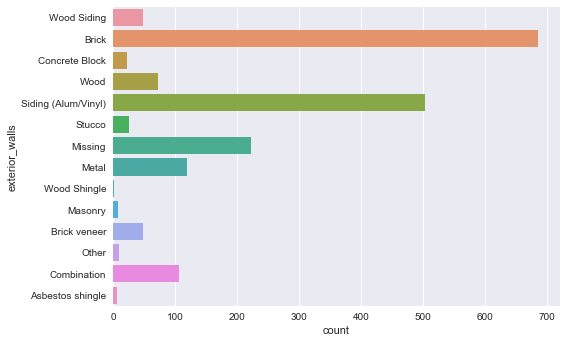

In [20]:
sns.countplot(y='exterior_walls',data=df)

In [21]:
df.exterior_walls.replace(['Wood Siding','Wood Shingle'],'Wood',inplace=True)

In [22]:
other_exterior_walls=['Concrete Block','Stucco','Masonry','Other','Asbestos shingle']

In [23]:
df.exterior_walls.replace(other_exterior_walls,'Other',inplace=True)

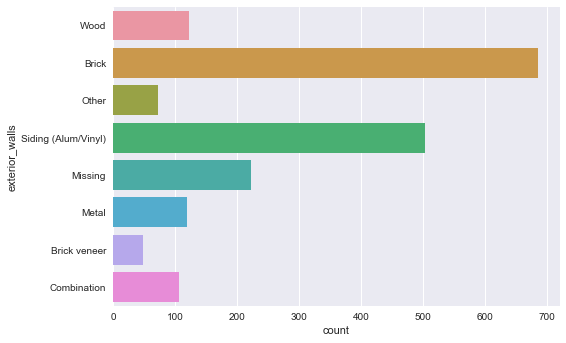

In [24]:
sns.countplot(y='exterior_walls',data=df)

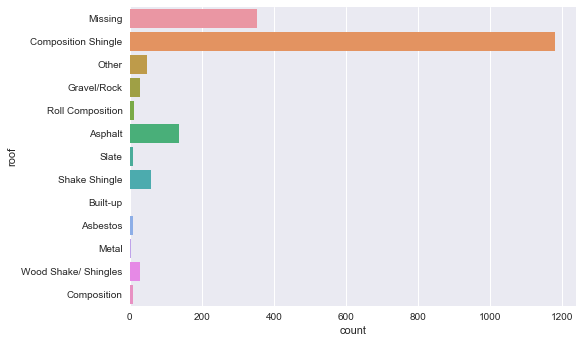

In [26]:
sns.countplot(y='roof',data=df)

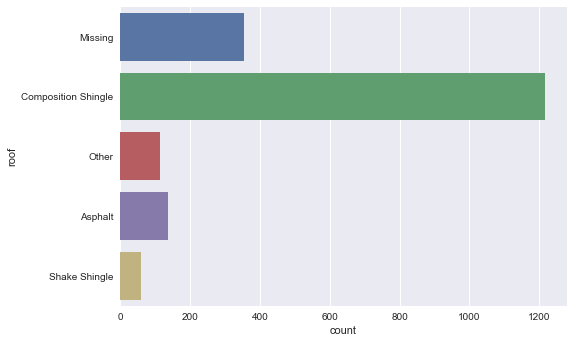

In [27]:
df.roof.replace(['Composition','Wood Shake/ Shingles'],'Composition Shingle',inplace=True)
other_roof=['Gravel/Rock','Roll Composition','Slate','Built-up','Asbestos','Metal','Other']
df.roof.replace(other_roof,'Other',inplace=True)
sns.countplot(y='roof',data=df)

## get dummies

In [28]:
df=pd.get_dummies(df,columns=['exterior_walls','roof','property_type'])

## remove unused

In [31]:
df=df.drop(['tx_year','year_built'],axis=1)

In [32]:
df.to_csv('analytical_base_table.csv',index=None)

# Regression Algorithms

In [43]:
from __future__ import print_function
print('Print function ready to serve.')

import numpy as np

import pandas as pd
pd.set_option('display.max_columns',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn

Print function ready to serve.


In [44]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [45]:
df=pd.read_csv('analytical_base_table.csv')
print(df.shape)

(1882, 39)


In [46]:
from sklearn.model_selection import train_test_split

In [54]:
y=df.tx_price
X=df.drop('tx_price',axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

In [56]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1505 377 1505 377


In [59]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,year_2010_2013,during_recession,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.00000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,3.423256,2.582060,2317.344850,12414.493023,0.873754,40.508306,4.558804,5.142193,5.372757,41.241860,3.42990,23.586711,16.072425,38.574751,69.006645,64.932226,467.594684,140.825914,6.485382,2.792691,0.091694,0.270432,0.270432,0.366777,0.027243,0.054485,0.067774,0.118272,0.035880,0.263787,0.065781,0.071096,0.653821,0.183389,0.060465,0.031229,0.425249,0.574751
std,1.063598,0.930467,1300.074359,33937.255726,0.332237,47.005419,4.527476,8.533942,7.516024,53.661914,4.67187,25.893539,17.758934,6.519806,19.577552,17.145712,231.361811,72.956816,1.998034,0.507471,0.288690,0.444331,0.444331,0.482085,0.162843,0.227048,0.251441,0.323038,0.186054,0.440832,0.247981,0.257071,0.475909,0.387113,0.238426,0.173995,0.494545,0.494545
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1352.000000,1575.000000,1.000000,7.000000,1.000000,0.000000,0.000000,7.000000,0.00000,4.000000,5.000000,33.000000,59.000000,53.000000,323.000000,96.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1908.000000,6050.000000,1.000000,23.000000,3.000000,2.000000,3.000000,22.000000,2.00000,15.000000,10.000000,38.000000,73.000000,66.000000,427.000000,127.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3000.000000,11761.000000,1.000000,58.000000,7.000000,6.000000,7.000000,51.000000,5.00000,35.000000,21.000000,43.000000,84.000000,78.000000,573.000000,171.000000,8.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7594.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.00000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_train_new=(X_train-X_train.mean())/X_train.std()

In [62]:
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,year_2010_2013,during_recession,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03
mean,7.317882e-17,-1.698162e-16,-2.843794e-17,-9.564147e-17,-2.075121e-16,4.060982e-17,-1.102108e-16,2.272084e-17,-2.703633e-17,-6.240855e-17,1.021700e-16,1.523329e-17,-2.006516e-17,3.308538e-16,7.583450e-17,-2.292740e-16,8.756377e-17,9.774389e-18,9.442428e-18,9.601769e-16,6.985922e-17,4.477777e-16,4.477777e-16,-1.704063e-16,-4.195979e-16,1.826520e-16,-3.511403e-17,-2.581914e-16,3.720538e-16,-4.545644e-16,-5.190385e-16,-1.873732e-16,2.314870e-16,3.214114e-16,-1.340382e-16,-2.841212e-16,3.688449e-17,-3.688449e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.278357e+00,-1.700286e+00,-1.397878e+00,-3.658072e-01,-2.629915e+00,-8.617795e-01,-1.006920e+00,-6.025577e-01,-7.148404e-01,-7.685499e-01,-7.341601e-01,-9.109111e-01,-9.050332e-01,-2.542215e+00,-2.962916e+00,-3.495464e+00,-1.640697e+00,-1.519062e+00,-2.745390e+00,-3.532601e+00,-3.176223e-01,-6.086277e-01,-6.086277e-01,-7.608145e-01,-1.672927e-01,-2.399718e-01,-2.695423e-01,-3.661257e-01,-1.928496e-01,-5.983855e-01,-2.652654e-01,-2.765629e-01,-1.373834e+00,-4.737337e-01,-2.536014e-01,-1.794840e-01,-8.598795e-01,-1.162181e+00
25%,-3.979472e-01,-6.255568e-01,-7.425305e-01,-3.193980e-01,3.799877e-01,-7.128605e-01,-7.860460e-01,-6.025577e-01,-7.148404e-01,-6.381036e-01,-7.341601e-01,-7.564324e-01,-6.234848e-01,-8.550486e-01,-5.111285e-01,-6.959306e-01,-6.249721e-01,-6.144171e-01,-7.434218e-01,4.085143e-01,-3.176223e-01,-6.086277e-01,-6.086277e-01,-7.608145e-01,-1.672927e-01,-2.399718e-01,-2.695423e-01,-3.661257e-01,-1.928496e-01,-5.983855e-01,-2.652654e-01,-2.765629e-01,-1.373834e+00,-4.737337e-01,-2.536014e-01,-1.794840e-01,-8.598795e-01,-1.162181e+00
50%,-3.979472e-01,4.491726e-01,-3.148626e-01,-1.875371e-01,3.799877e-01,-3.724742e-01,-3.442987e-01,-3.681994e-01,-3.156932e-01,-3.585757e-01,-3.060660e-01,-3.316160e-01,-3.419364e-01,-8.815459e-02,2.039762e-01,6.227645e-02,-1.754597e-01,-1.895082e-01,2.575622e-01,4.085143e-01,-3.176223e-01,-6.086277e-01,-6.086277e-01,-7.608145e-01,-1.672927e-01,-2.399718e-01,-2.695423e-01,-3.661257e-01,-1.928496e-01,-5.983855e-01,-2.652654e-01,-2.765629e-01,7.274062e-01,-4.737337e-01,-2.536014e-01,-1.794840e-01,-8.598795e-01,8.598795e-01
75%,5.422577e-01,4.491726e-01,5.250893e-01,-1.925592e-02,3.799877e-01,3.721208e-01,5.391958e-01,1.005171e-01,2.165031e-01,1.818448e-01,3.360752e-01,4.407775e-01,2.774702e-01,6.787394e-01,7.658442e-01,7.621599e-01,4.555865e-01,4.135883e-01,7.580541e-01,4.085143e-01,-3.176223e-01,1.641949

In [64]:
X_test_new=(X_test-X_train.mean())/X_train.std()

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
make_pipeline(StandardScaler(),Lasso(random_state=123))

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [70]:
pipelines={
    'lasso': make_pipeline(StandardScaler(),Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(),Ridge(random_state=123)),
    'enet': make_pipeline(StandardScaler(),ElasticNet(random_state=123))
}

In [71]:
pipelines['rf']= make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123))
pipelines['gb']= make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))

In [72]:
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [79]:
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

In [80]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [81]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [83]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

for key in ['enet','gb','ridge','rf','lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.')
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.')
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [88]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [90]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [91]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


## Evaluate the model

In [92]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.318953531836
ridge 0.324022113102
enet 0.339675882892
rf 0.483015410456
gb 0.481735432885


In [93]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [94]:
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [95]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [96]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.470720161712
MAE: 78839.8003979


In [97]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.319862382943
MAE: 93349.6597087

ridge
--------
R^2: 0.320915821403
MAE: 93273.2337164

enet
--------
R^2: 0.328637356077
MAE: 94003.3130853

rf
--------
R^2: 0.470720161712
MAE: 78839.8003979

gb
--------
R^2: 0.443858530613
MAE: 80944.301273



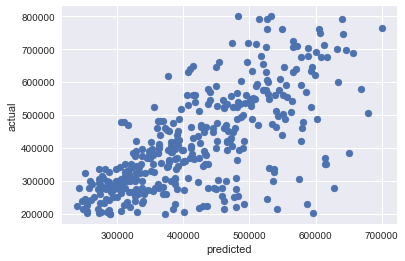

In [98]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [99]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [100]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [101]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])

In [102]:
import pickle

In [103]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)